# Proyek Analisis Data: [Air Quality Dataset]
- **Nama:** [Rashad Muhammad Fajar]
- **Email:** [rashadfajar@gmail.com]
- **ID Dicoding:** [rashadfajar]

## Menentukan Pertanyaan Bisnis

- Kapan waktu dengan risiko tinggi pencemaran udara berdasarkan pola konsentrasi PM2.5?
- Faktor meteorologi apa yang paling berpengaruh terhadap fluktuasi PM2.5?

## Import Semua Packages/Library yang Digunakan

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

## Data Wrangling

### Gathering Data

In [74]:
file_path = 'Data/PRSA_Data_Guanyuan_20130301-20170228.csv'
data = pd.read_csv(file_path)

data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [39]:
data.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34448.000000,34635.000000,34590.000000,34405.000000,33311.000000,33891.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.933372,109.023303,17.590941,57.901643,1271.294377,55.795044,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.933497,91.573709,23.600367,35.150857,1164.854945,57.436983,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,3.000000,31.000000,500.000000,7.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,89.000000,8.000000,51.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.000000,149.000000,22.000000,78.000000,1600.000000,81.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,680.000000,999.000000,293.000000,270.000000,10000.000000,415.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


**Insight:**
- Dataset ini berisi data kualitas udara dan cuaca per jam di Guanyuan pada periode 1 Maret 2013 hingga 28 Februari 2017 dengan beberapa variabel terkait polusi udara dan kondisi atmosfer.Data ini terdiri dari 18 kolom yang terdiri waktu dan variabel seperti  PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, arah angin (wd), kecepatan angin (WSPM), dan stasiun pengukuran (station).
- Data pada beberapa kolom memiliki data kosong terutama pada polutan udara seperti CO dan O3.
- Data ini dalam bentuk per jam sehingga dapat mengetahui waktu atau jam berapa polusi udara seperti PM2.5 tertinggi terjadi.

### Assessing Data

In [75]:
missing_data = data.isnull().sum()
print("Nilai yang hilang pada setiap kolom:\n", missing_data)

duplicate_data = data.duplicated().sum()
print(f"\nJumlah duplikasi data: {duplicate_data}")


Nilai yang hilang pada setiap kolom:
 No            0
year          0
month         0
day           0
hour          0
PM2.5       616
PM10        429
SO2         474
NO2         659
CO         1753
O3         1173
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

Jumlah duplikasi data: 0


**Insight:**
- Data memiliki nilai kosong disemua variabel polutan dan kondisi atmosfer
- tidak terdapat duplikasi data pada setiap row data

### Cleaning Data

In [76]:
# Konversi kolom waktu jika diperlukan
data['date'] = pd.to_datetime(data[['year', 'month', 'day', 'hour']])
# Mengisi data yang hilang dengan interpolasi untuk semua kolom kecuali RAIN
columns_to_interpolate = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'WSPM']
data[columns_to_interpolate] = data[columns_to_interpolate].interpolate(method='linear', limit_direction='forward')

# Mengisi data yang hilang pada kolom RAIN dengan nilai 0
data['RAIN'] = data['RAIN'].fillna(0)

most_frequent_wd = data['wd'].mode()[0]
data['wd'] = data['wd'].fillna(most_frequent_wd)

# Verifikasi bahwa semua nilai hilang telah diisi
missing_values_after = data.isnull().sum()
print("Nilai hilang setelah pembersihan:" ,missing_values_after)

Nilai hilang setelah pembersihan: No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
date       0
dtype: int64


**Insight:**
- Data ini harus diisi dan tidak boleh di hapus karena data bersifat temporal atau deret waktu
- Kolom waktu (year, month, day, hour) dikonversi menjadi format datetime untuk mempermudah analisis data deret waktu, seperti tren harian, bulanan, atau musiman. Format datetime juga memungkinkan interpolasi data menjadi lebih akurat karena mempertimbangkan urutan kronologis.
- Interpolasi linear mengisi data hilang berdasarkan nilai sebelum dan sesudahnya, mempertahankan pola temporal dalam data. Kolom seperti PM2.5, TEMP, dan PRES sering menunjukkan variasi bertahap yang lebih baik direpresentasikan dengan interpolasi dibandingkan metode lain seperti mean atau median.
- Nilai RAIN seringkali bersifat diskret dimana 0 mempresentasikan tidak hujan.
- wd (arah angin) merupakan data kategorikal, sehingga metode interpolasi tidak bisa diterapkan.
Modus adalah pendekatan logis karena mewakili arah angin yang paling sering terjadi dalam dataset, membuat pengisian data tetap realistis dan tidak mengubah distribusi arah angin secara signifikan.


## Exploratory Data Analysis (EDA)

### Explore ...

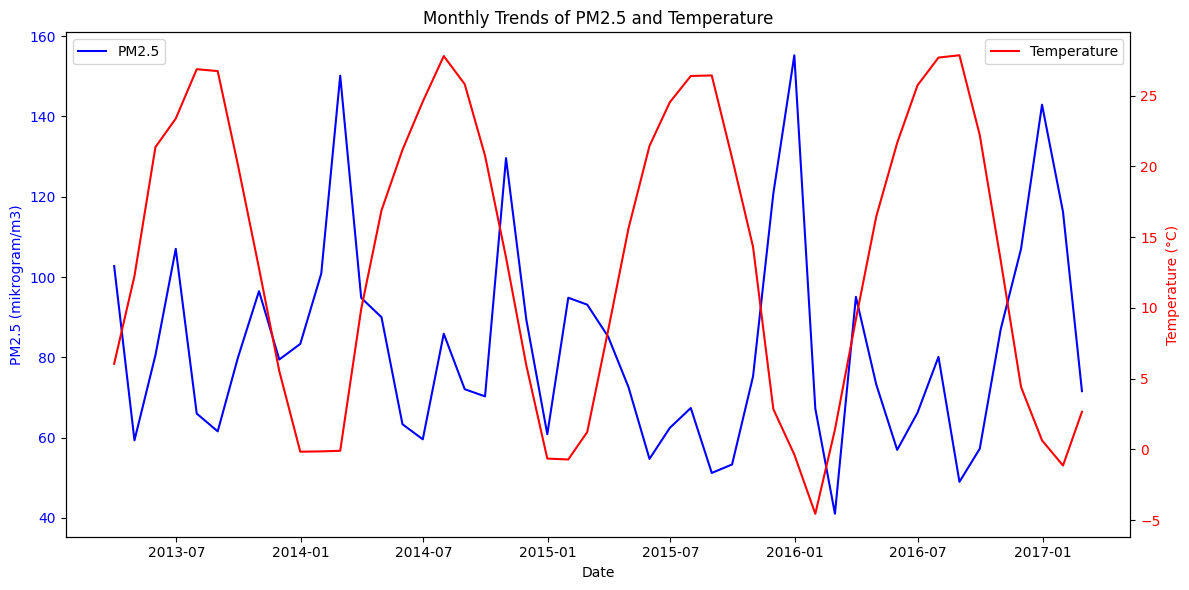

In [77]:
data.set_index('date', inplace=True, drop=False)
monthly_avg_PM25 = data['PM2.5'].resample('ME').mean()
monthly_avg_temp = data['TEMP'].resample('ME').mean()

# Create figure and axis for PM2.5 and Temperature
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot PM2.5 on the left y-axis
ax1.plot(monthly_avg_PM25.index, monthly_avg_PM25, label='PM2.5', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('PM2.5 (mikrogram/m3)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create secondary y-axis for Temperature
ax2 = ax1.twinx()
ax2.plot(monthly_avg_temp.index, monthly_avg_temp, label='Temperature', color='red')
ax2.set_ylabel('Temperature (°C)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and legends
plt.title('Monthly Trends of PM2.5 and Temperature')
fig.tight_layout()

# Display legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

**Insight:**
- PM2.5 terlihat mencapai puncaknya ketika suhu menurun, dan sebaliknya, menunjukkan potensi korelasi negatif antara keduanya. Ini mengindikasikan bahwa konsentrasi PM2.5 lebih tinggi selama bulan-bulan yang lebih dingin.

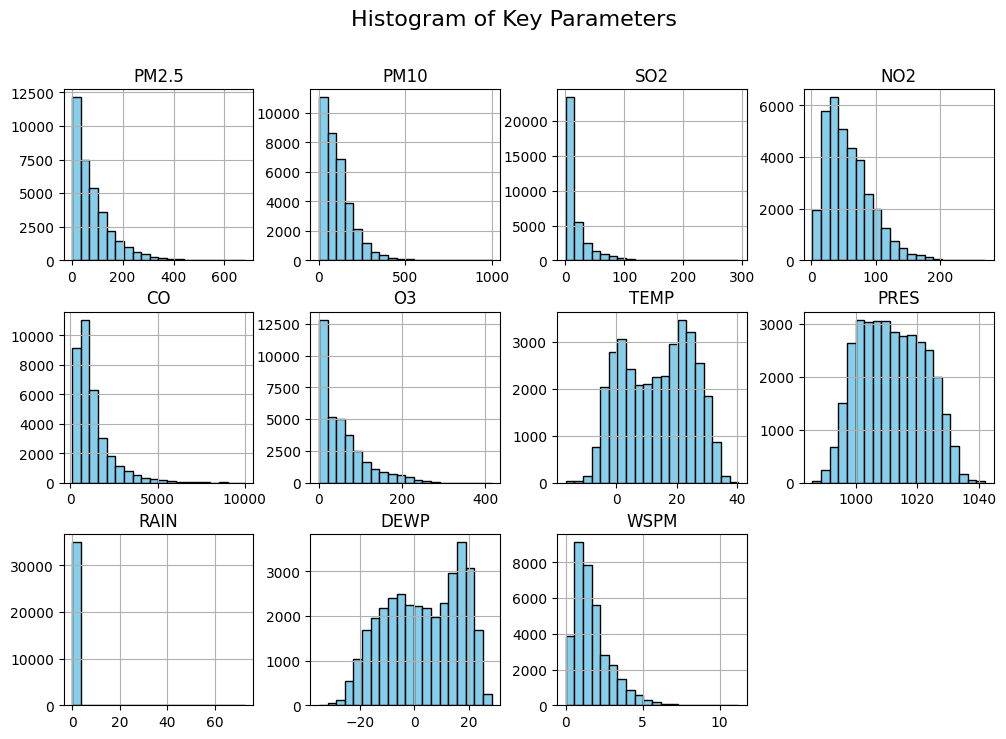

In [78]:
# Histogram untuk melihat distribusi
columns_to_plot = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'RAIN','DEWP', 'WSPM']
data[columns_to_plot].hist(figsize=(12, 8), bins=20, color='skyblue', edgecolor='black', layout=(3, 4))
plt.suptitle('Histogram of Key Parameters', fontsize=16)
plt.show()

**Insight:**
- Sebagian besar parameter memiliki distribusi yang right-skewed, seperti PM2.5, PM10, SO2, NO2, CO, dan O3, yang menunjukkan banyaknya konsentrasi rendah dan hanya sedikit data dengan konsentrasi tinggi.
- Suhu (TEMP) dan Titik Embun (DEWP) memiliki distribusi yang mendekati normal.
- Curah hujan (RAIN) memiliki banyak data dengan nilai nol, menunjukkan bahwa hari hujan di daerah Guanyuan sangat sedikit.

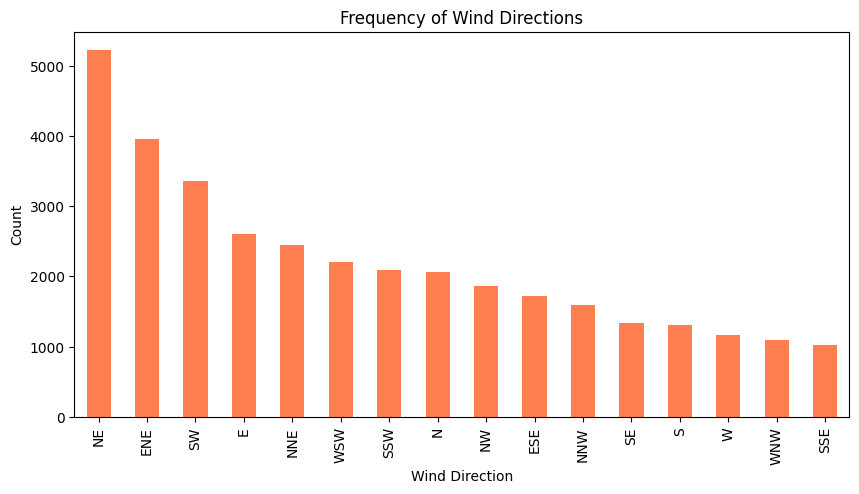

In [79]:
# Frekuensi arah angin
wd_counts = data['wd'].value_counts()

# Plot arah angin
wd_counts.plot(kind='bar', figsize=(10, 5), color='coral')
plt.title('Frequency of Wind Directions')
plt.xlabel('Wind Direction')
plt.ylabel('Count')
plt.show()

**Insight:**
- Angin lebih sering bertiup dari arah timur laut (NE) dan timur-timur laut (ENE), sedangkan arah lainnya kurang dominan.

In [80]:
# Daftar polutan yang ingin dianalisis
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Dictionary untuk menyimpan hasil
extreme_pollutants = {}

# Loop untuk setiap polutan
for pollutant in pollutants:
    max_value = data[pollutant].max()  # Nilai maksimum polutan
    extreme_days = data[data[pollutant] == max_value]  # Hari dengan nilai maksimum
    extreme_pollutants[pollutant] = extreme_days[[pollutant, 'TEMP', 'PRES', 'RAIN','DEWP', 'WSPM', 'wd']]  # Simpan hasil

# Menampilkan hasil
for pollutant, extreme_days in extreme_pollutants.items():
    print(f"Hari dengan {pollutant} tertinggi:")
    print(extreme_days)
    print()



Hari dengan PM2.5 tertinggi:
                     PM2.5  TEMP    PRES  RAIN  DEWP  WSPM wd
date                                                         
2015-12-01 14:00:00  680.0   0.3  1013.4   0.0   0.2   1.2  E

Hari dengan PM10 tertinggi:
                      PM10  TEMP    PRES  RAIN  DEWP  WSPM wd
date                                                         
2013-10-29 11:00:00  999.0  15.3  1022.8   0.0  -3.1   3.7  N

Hari dengan SO2 tertinggi:
                       SO2  TEMP    PRES  RAIN  DEWP  WSPM  wd
date                                                          
2017-02-04 01:00:00  293.0   0.1  1016.4   0.0  -8.1   0.6  NE

Hari dengan NO2 tertinggi:
                       NO2  TEMP    PRES  RAIN  DEWP  WSPM   wd
date                                                           
2013-03-07 12:00:00  270.0  17.1  1001.6   0.0  -3.1   3.7  SSW

Hari dengan CO tertinggi:
                          CO  TEMP    PRES  RAIN  DEWP  WSPM   wd
date                                    

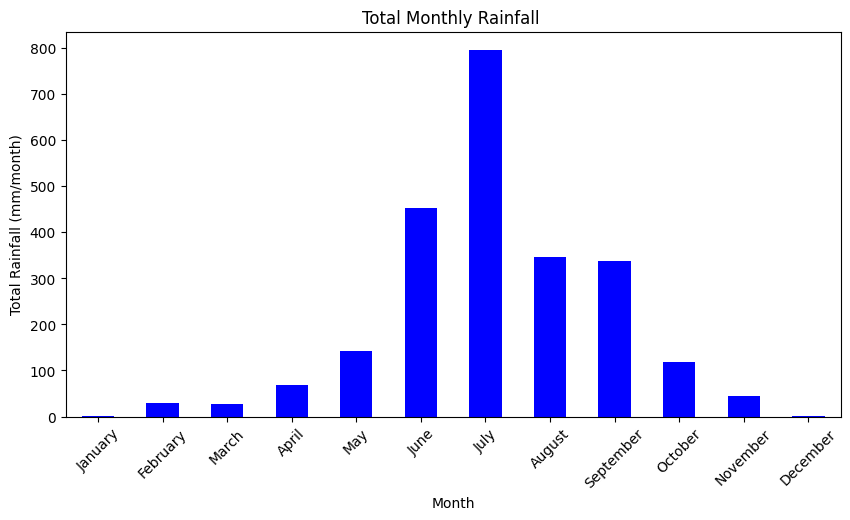

In [81]:
# Jumlah hujan (>0 mm) per bulan
total_rain_by_month = data.groupby('month')['RAIN'].sum()

# Plot
total_rain_by_month.plot(kind='bar', figsize=(10, 5), color='blue')
plt.title('Total Monthly Rainfall ')
plt.xlabel('Month')
plt.ylabel('Total Rainfall (mm/month)')
plt.xticks(ticks=range(0, 12), labels=[
    'January', 'February', 'March', 'April', 'May', 
    'June', 'July', 'August', 'September', 'October', 
    'November', 'December'], rotation=45)
plt.show()


**Insight:**
- Curah hujan bulanan pada grafik terlihat memiliki pola musiman yang jelas. Curah hujan bulanan tertinggi terjadi pada bulan Juni, Juli dan Agustus, dengan puncak curah hujan mencapai lebih dari 700 mm. Sementara itu, curah hujan terendah terjadi pada bulan January dan Desember yang terlihat hampir tidak terjadi hujan atau 0 mm

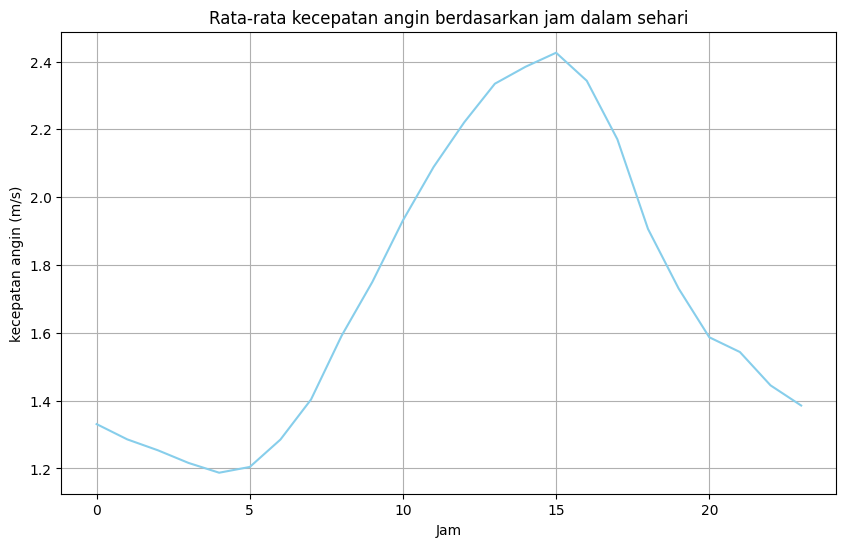

In [82]:
# Rata-rata PM2.5 per jam dalam sehari
hourly_wspm = data.groupby(data['date'].dt.hour)['WSPM'].mean()
plt.figure(figsize=(10, 6))
hourly_wspm.plot(kind='line', color='skyblue')
plt.title('Rata-rata kecepatan angin berdasarkan jam dalam sehari')
plt.xlabel('Jam')
plt.ylabel('kecepatan angin (m/s)')
plt.grid()
plt.show()

**Insight:**
- Kecepatan angin pada siang hari lebih tinggi dari pada malam hari sehingga dapat menyebabkan tersebarnya kosentrasi polalutan pada siang hari dari pada malam hari

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kapan waktu dengan risiko tinggi pencemaran udara berdasarkan pola konsentrasi PM2.5?

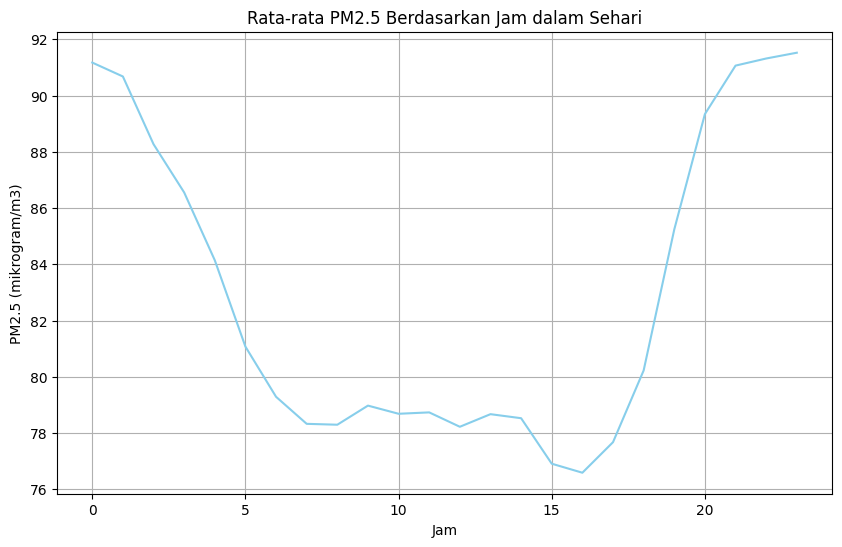

In [83]:
# Rata-rata PM2.5 per jam dalam sehari
hourly_pm25 = data.groupby(data['date'].dt.hour)['PM2.5'].mean()
plt.figure(figsize=(10, 6))
hourly_pm25.plot(kind='line', color='skyblue')
plt.title('Rata-rata PM2.5 Berdasarkan Jam dalam Sehari')
plt.xlabel('Jam')
plt.ylabel('PM2.5 (mikrogram/m3)')
plt.grid()
plt.show()

**Insight:**
- Rata-rata PM2.5 berdasarkan jam dalam sehari menunjukkan kosentrasi PM2.5 cenderung lebih rendah pada siang hari, dengan puncak di sekitar jam 10-12 siang. Konsentrasi tertinggi terjadi pada malam hari, sekitar jam 22-24. Saat malam hari, permukaan tanah mendingin lebih cepat daripada lapisan udara di atasnya, menciptakan lapisan inversi suhu. Lapisan inversi ini menjebak polutan di dekat permukaan tanah, meningkatkan konsentrasi PM2.5. Sebaliknya, di siang hari, radiasi matahari memanaskan permukaan tanah, menciptakan aliran udara ke atas yang menyebarkan polutan secara vertikal sehingga konsentrasi PM2.5 berkurang. Pada malam hari juga di daerah Guanyuan memiliki kecepatan angin yang rendah dibandingkan siang hari sehingga penyebaran PM2.5 terbatas yang menyebabkan akumulasi lokal PM2.5. 

### Pertanyaan 2: Faktor meteorologi apa yang paling berpengaruh terhadap fluktuasi PM2.5?

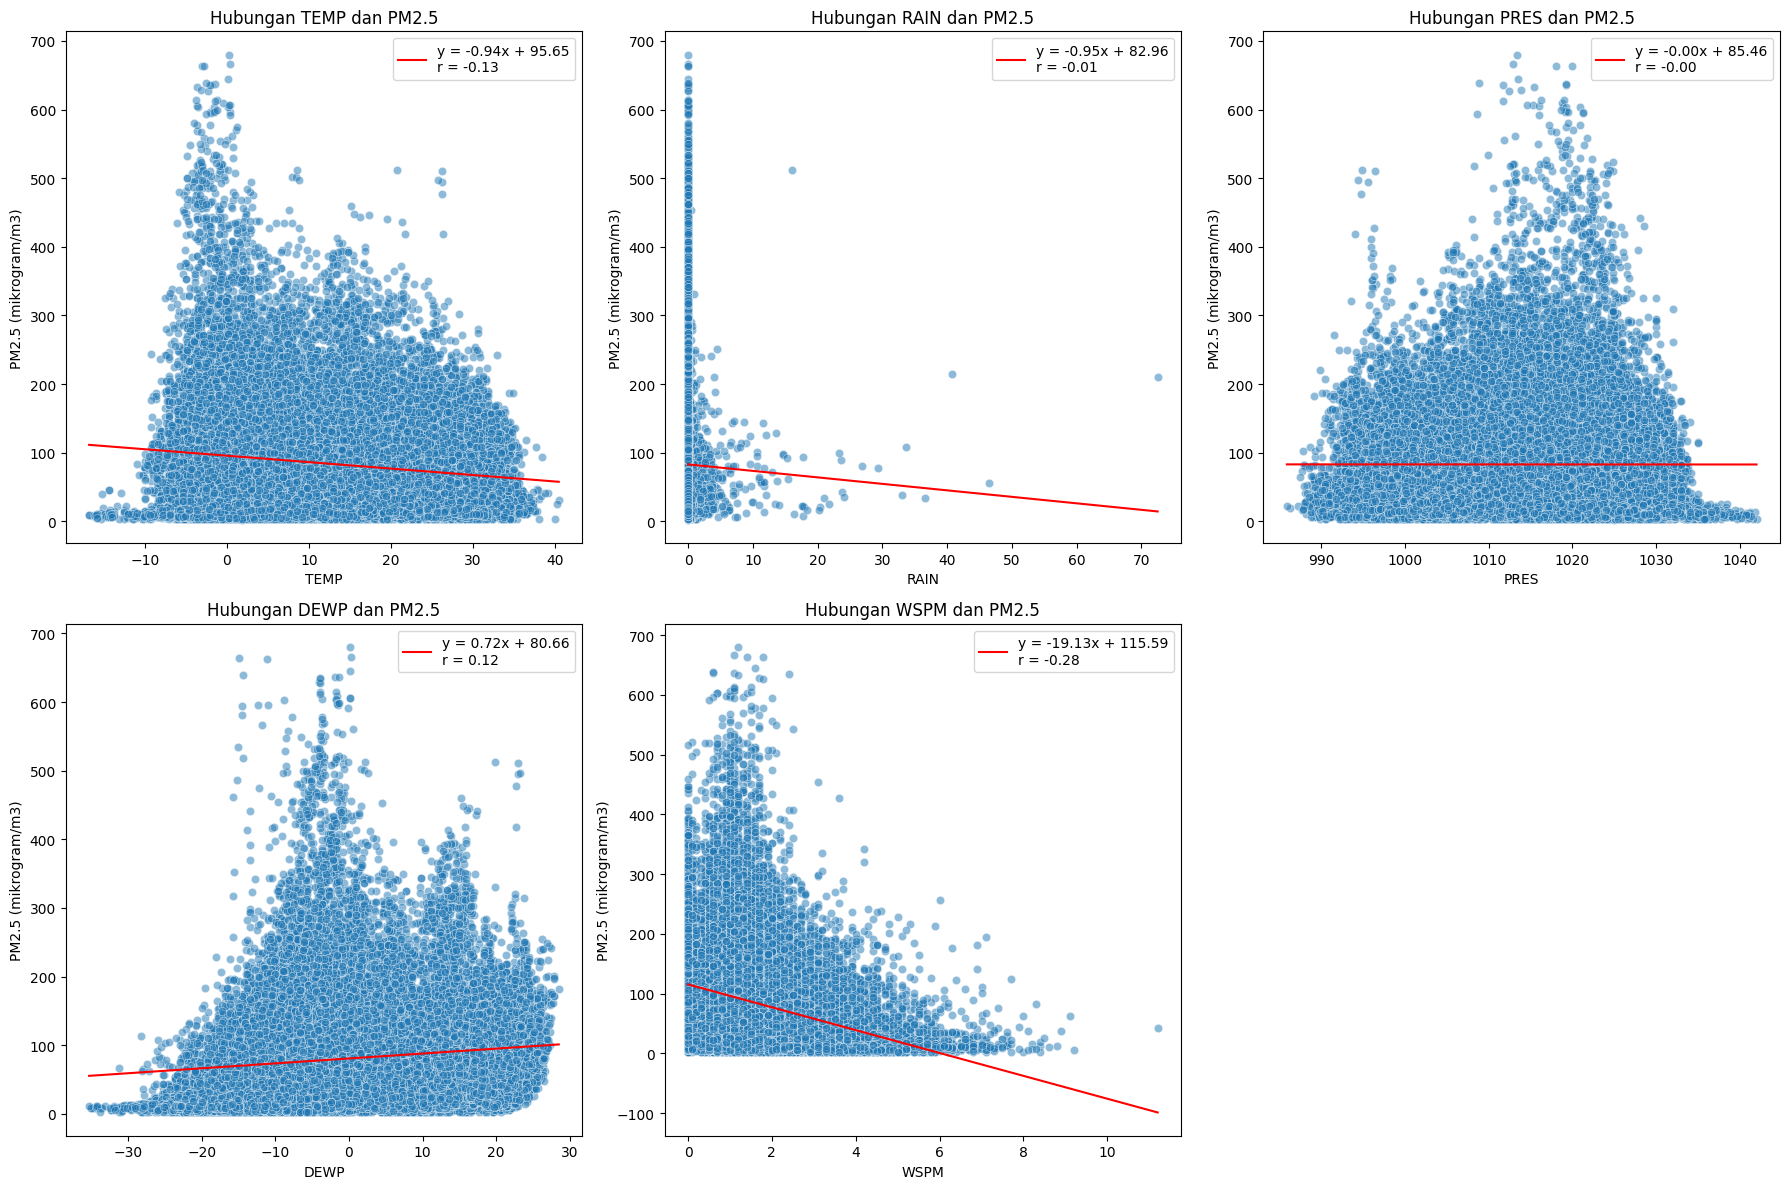

In [84]:
# Kolom yang akan dibandingkan dengan PM2.5
factors = ['TEMP', 'RAIN', 'PRES', 'DEWP', 'WSPM']

# Hitung korelasi untuk setiap faktor terhadap PM2.5
correlation = data[['PM2.5'] + factors].corr()

# Buat grid 2x3 untuk scatterplot
fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # Grid 2x3
axes = axes.flatten()  # Ratakan array subplot

for i, factor in enumerate(factors):
    # Korelasi antara faktor saat ini dan PM2.5
    corr_value = correlation.loc['PM2.5', factor]
    
    # Scatterplot dengan nilai korelasi di judul
    sns.scatterplot(x=factor, y='PM2.5', data=data, alpha=0.5, ax=axes[i])
    
    # Tambahkan garis tren
    slope, intercept, r_value, p_value, std_err = linregress(data[factor], data['PM2.5'])
    axes[i].plot([data[factor].min(), data[factor].max()], 
                [slope * data[factor].min() + intercept, 
                 slope * data[factor].max() + intercept], 
                color='red', label=f'y = {slope:.2f}x + {intercept:.2f}\nr = {r_value:.2f}')
    
    axes[i].set_title(f'Hubungan {factor} dan PM2.5')
    axes[i].set_xlabel(f'{factor}')
    axes[i].set_ylabel('PM2.5 (mikrogram/m3)')
    axes[i].legend()

# Matikan subplot kosong jika ada
for i in range(len(factors), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

**Insight:**
- Hubungan TEMP dan PM2.5:
    - Garis tren menunjukkan tren negatif, sesuai dengan nilai korelasi -0.13.
    - Ini berarti semakin tinggi suhu, cenderung semakin rendah konsentrasi PM2.5.
- Hubungan RAIN dan PM2.5:
    - Garis tren hampir horizontal, menunjukkan korelasi yang sangat lemah (-0.01).
    - Curah hujan terlihat tidak memiliki pengaruh yang signifikan terhadap konsentrasi PM2.5.
- Hubungan PRES dan PM2.5:
    - Grafik menunjukkan korelasi yang sangat lemah bahkan tidak ada korelasi (0.00) antara tekanan udara (PRES) dan PM2.5.
    - Sebaran data terlihat menyebar secara acak, tanpa pola yang jelas.
    - Tekanan udara tampaknya bukan faktor utama yang mempengaruhi konsentrasi PM2.5 di lokasi ini.
- Hubungan DEWP dan PM2.5:
    - Garis tren menunjukkan tren positif, meskipun korelasi hanya 0.12.
    - Peningkatan kelembaban uap cenderung diikuti dengan kenaikan konsentrasi PM2.5.
- Hubungan WSPM dan PM2.5:
    - Garis tren memiliki kemiringan negatif, sesuai dengan korelasi -0.28.
    - Semakin tinggi kecepatan angin, semakin rendah konsentrasi PM2.5 yang terukur.

## Conclusion

- Konsentrasi PM2.5 di Guanyuan cenderung lebih rendah pada siang hari karena sinar matahari dan udara yang bergerak ke atas membantu menyebarkan polutan. Sebaliknya, konsentrasi tertinggi terjadi pada malam hari karena udara dingin dekat permukaan tanah menjebak polutan, ditambah angin yang lemah membuat polutan sulit menyebar.
- Faktor meteorologi yang paling mempengaruhi fluktuasi PM2.5 di Guanyuan adalah kecepatan angin yang memiliki korelasi negtif yaitu -0.28 yang mengindikasikan bahwa semakin tinggi kecepatan angin, semakin rendah konsentrasi PM2.5.

In [53]:
data.to_csv("all_data.csv", index=False)